In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [222]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [223]:
plt.style.use('ggplot')

In [224]:
MODELS = [
    "xlm-roberta-base",
    "bert-base-multilingual-cased",
    "allenai/longformer-base-4096",
    "microsoft/deberta-base",
    "distilbert-base-multilingual-cased",
    "roberta-base",
    "xlnet-base-cased",
    "bert-base-uncased",
    "google/electra-base-discriminator",
    "distilroberta-base",
    "distilbert-base-uncased",
    "albert-base-v2",
]

In [225]:
import os

def get_all_group_score(data_dir, max_length_list = [16, 32, 64, 128, 256, 512]):
    df = pd.DataFrame(index=[f"T={max_length}" for max_length in max_length_list], columns=MODELS)
    
    df_train = pd.DataFrame(index=[f"T={max_length}" for max_length in max_length_list], columns=MODELS)

    import json

    for max_length in max_length_list:
        print(max_length)
        index_name = f"T={max_length}"
        # f"../results/20000/{max_length}/group_score.csv"
        data = pd.read_csv(os.path.join(data_dir, str(max_length),"group_score.csv"), index_col=0)
        df.loc[index_name] = data.loc["test"]
        df_train.loc[index_name] = data.loc["train"]
#         print(json.dumps(dict(data.loc["test"]), indent=4))
        assert dict(data.loc["test"]) == dict(df.loc[index_name])
    
    df["group correlation"] = df.mean(axis=1)
    df_train["group correlation"] = df_train.mean(axis=1)
    return df_train, df

In [226]:
data_dir = "../results/128k"
df_train, df_test = get_all_group_score(data_dir, [2, 4, 8, 16, 32, 64, 128, 256, 512])

df_train.to_csv(os.path.join(data_dir, "group_score_all_train.csv"))

df_test.to_csv(os.path.join(data_dir, "group_score_all_test.csv"))

2
4
8
16
32
64
128
256
512


In [227]:
df_train

,xlm-roberta-base,bert-base-multilingual-cased,allenai/longformer-base-4096,microsoft/deberta-base,distilbert-base-multilingual-cased,roberta-base,xlnet-base-cased,bert-base-uncased,google/electra-base-discriminator,distilroberta-base,distilbert-base-uncased,albert-base-v2,group correlation
T=2,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
T=4,0.714979,0.789451,0.897443,0.799423,0.871313,0.87623,0.701969,0.811492,0.68265,0.91836,0.878045,0.816018,0.813114
T=8,0.582756,0.699357,0.901098,0.709796,0.811203,0.889002,0.424429,0.754064,0.576262,0.878982,0.838432,0.691751,0.729761
T=16,0.67981,0.731798,0.933663,0.791346,0.834463,0.929376,0.413699,0.815401,0.66794,0.901416,0.880698,0.766201,0.778818
T=32,0.764127,0.767581,0.950551,0.854394,0.861251,0.949476,0.462685,0.865947,0.766551,0.922427,0.91442,0.828577,0.825666
T=64,0.817647,0.806186,0.961812,0.894742,0.888356,0.961304,0.738076,0.899957,0.846095,0.939512,0.937041,0.872118,0.880237
T=128,0.861259,0.811177,0.972846,0.9197,0.905586,0.972813,0.871212,0.921607,0.893662,0.953272,0.950984,0.903044,0.911430
T=256,0.889843,0.861306,0.979836,0.935269,0.921502,0.979724,0.916449,0.935047,0.923211,0.963112,0.958202,0.92388,0.932282
T=512,0.912526,0.896253,0.978656,0.944889,0.933984,0.980783,0.935654,0.942629,0.941018,0.969363,0.961665,0.938518,0.944662


In [228]:
df_test

,xlm-roberta-base,bert-base-multilingual-cased,allenai/longformer-base-4096,microsoft/deberta-base,distilbert-base-multilingual-cased,roberta-base,xlnet-base-cased,bert-base-uncased,google/electra-base-discriminator,distilroberta-base,distilbert-base-uncased,albert-base-v2,group correlation
T=2,-84.7768,-0.68562,-0.0925058,-0.356211,-0.438231,-7.09885,-2.62553,-1.18842,-0.986339,-221.315,-0.271046,-0.271905,-26.675515
T=4,0.634708,0.734752,0.871994,0.744405,0.835657,0.847077,0.62756,0.766716,0.599863,0.897695,0.847213,0.770613,0.764854
T=8,0.524582,0.650209,0.887849,0.667763,0.779808,0.873819,0.335502,0.716652,0.513507,0.863232,0.814112,0.643933,0.689247
T=16,0.631944,0.684686,0.924028,0.755463,0.804838,0.918602,0.325473,0.782929,0.614259,0.886822,0.859309,0.723951,0.742692
T=32,0.717943,0.723418,0.941255,0.826046,0.833064,0.940062,0.376584,0.83849,0.717298,0.907657,0.895934,0.792744,0.792541
T=64,0.771354,0.768972,0.954188,0.873781,0.865908,0.953189,0.686808,0.878398,0.806621,0.926356,0.92302,0.843463,0.854338
T=128,0.821523,0.775345,0.966787,0.902228,0.884338,0.966726,0.84191,0.903619,0.861779,0.94182,0.939589,0.87904,0.890392
T=256,0.856155,0.831199,0.975255,0.920229,0.903548,0.97503,0.89588,0.918931,0.899325,0.953591,0.947655,0.904393,0.915099
T=512,0.880845,0.874081,0.974052,0.931139,0.917644,0.976068,0.919369,0.928288,0.922793,0.961156,0.951438,0.922272,0.929929


In [235]:
full_name = list(df_test.columns)

full_name

['xlm-roberta-base',
 'bert-base-multilingual-cased',
 'allenai/longformer-base-4096',
 'microsoft/deberta-base',
 'distilbert-base-multilingual-cased',
 'roberta-base',
 'xlnet-base-cased',
 'bert-base-uncased',
 'google/electra-base-discriminator',
 'distilroberta-base',
 'distilbert-base-uncased',
 'albert-base-v2',
 'group correlation']

In [236]:
df = pd.read_csv("./ARR revision LMD results - pairwise-R2.csv", index_col=0)
assert list(df.index) == list(df.columns)

df

,XLM-R,M-BERT,Longformer,DeBERTa,distil-M-BERT,RoBERTa,XLNet,BERT,ELECTRA,distil-RoBERTa,distil-BERT,ALBERT
XLM-R,1.00,0.78,0.80,0.80,0.80,0.80,0.73,0.77,0.71,0.81,0.79,0.78
M-BERT,0.68,1.00,0.69,0.69,0.80,0.69,0.66,0.69,0.55,0.70,0.71,0.65
Longformer,0.81,0.80,1.00,0.86,0.80,0.96,0.81,0.82,0.74,0.92,0.83,0.80
DeBERTa,0.82,0.81,0.88,1.00,0.80,0.88,0.82,0.83,0.75,0.87,0.84,0.81
distil-M-BERT,0.77,0.88,0.77,0.77,1.00,0.77,0.74,0.76,0.62,0.78,0.78,0.74
RoBERTa,0.81,0.80,0.96,0.86,0.80,1.00,0.80,0.81,0.75,0.93,0.83,0.80
XLNet,0.84,0.83,0.85,0.86,0.82,0.85,1.00,0.80,0.79,0.85,0.81,0.84
BERT,0.67,0.72,0.75,0.74,0.69,0.74,0.70,1.00,0.58,0.73,0.90,0.69
ELECTRA,0.80,0.81,0.84,0.85,0.79,0.84,0.79,0.84,1.00,0.82,0.84,0.84
distil-RoBERTa,0.84,0.83,0.93,0.88,0.83,0.94,0.83,0.83,0.76,1.00,0.85,0.82


In [237]:
short_name = list(df.columns)

short_name

['XLM-R',
 'M-BERT',
 'Longformer',
 'DeBERTa',
 'distil-M-BERT',
 'RoBERTa',
 'XLNet',
 'BERT',
 'ELECTRA',
 'distil-RoBERTa',
 'distil-BERT',
 'ALBERT']

In [238]:
full_to_short = {
    f: s for f, s in zip(full_name, short_name)
}

full_to_short

{'xlm-roberta-base': 'XLM-R',
 'bert-base-multilingual-cased': 'M-BERT',
 'allenai/longformer-base-4096': 'Longformer',
 'microsoft/deberta-base': 'DeBERTa',
 'distilbert-base-multilingual-cased': 'distil-M-BERT',
 'roberta-base': 'RoBERTa',
 'xlnet-base-cased': 'XLNet',
 'bert-base-uncased': 'BERT',
 'google/electra-base-discriminator': 'ELECTRA',
 'distilroberta-base': 'distil-RoBERTa',
 'distilbert-base-uncased': 'distil-BERT',
 'albert-base-v2': 'ALBERT'}

In [239]:
import seaborn as sns

sns.set_theme(style="white")

def plot_corr_heatmap(df_corr, fname):
    fig, ax = plt.subplots(figsize=(7, 6))
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)
    # adjust mask and df
    corr = df_corr
    # plot heatmap
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
               vmin=0.5, vmax=1, cbar_kws={"shrink": .8})
    # yticks

    ax.xaxis.tick_top()
    ax.yaxis.tick_left()

    plt.xticks(rotation=45, ha="left")
    plt.yticks(rotation=45)

    plt.savefig(fname, bbox_inches='tight', dpi=100)

    plt.show()

In [251]:
def read_df(filename):
    df = pd.read_csv(filename, index_col=0)
    assert list(df.index) == list(df.columns)

    df.columns = [full_to_short.get(c, c) for c in df.columns]
    df.index = [full_to_short.get(c, c) for c in df.index]

    df = df.reindex(index=short_name, columns=short_name)
    
    df = df.fillna(1)
    return df

<ipython-input-239-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


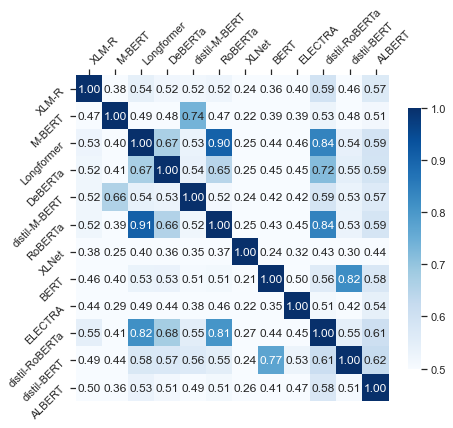

<ipython-input-239-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


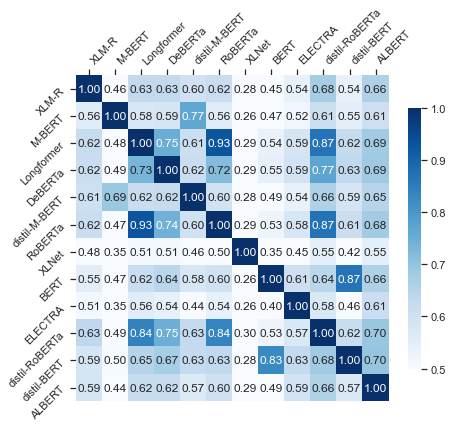

<ipython-input-239-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


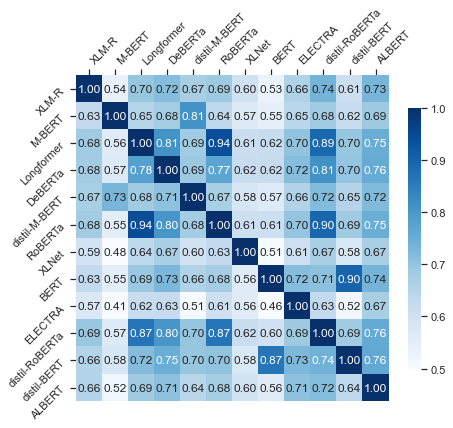

<ipython-input-239-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


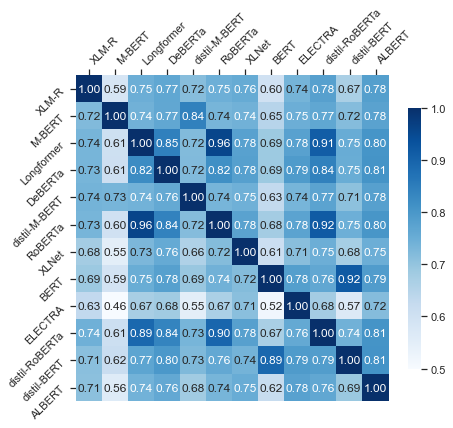

<ipython-input-239-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


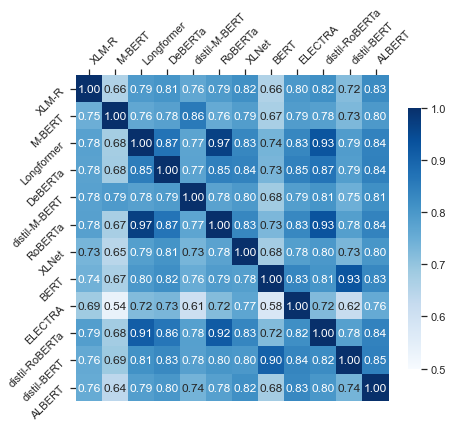

<ipython-input-239-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


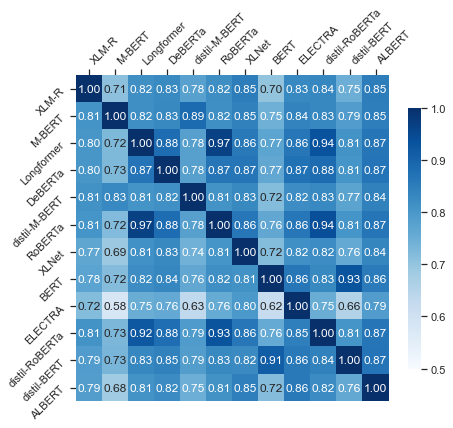

In [261]:
for L in [16, 32, 64, 128, 256, 512]:
    
    df = read_df(f"../results/128k/{L}/pairwise_score_test.csv")
    df.to_html()

    plot_corr_heatmap(df, f'wikicorpus-pairwise-R2-{L}.pdf')

<ipython-input-239-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


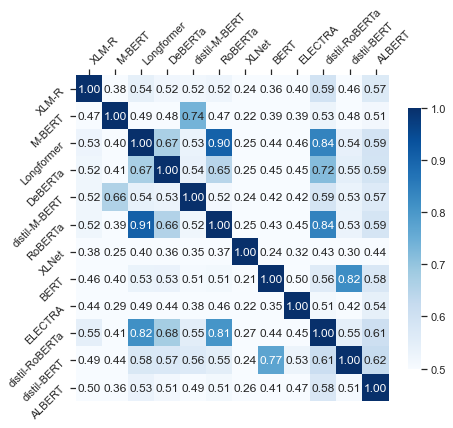

In [232]:
df = pd.read_csv("./ARR revision LMD results - pairwise-R2.csv", index_col=0)
assert list(df.index) == list(df.columns)

df

,XLM-R,M-BERT,Longformer,DeBERTa,distil-M-BERT,RoBERTa,XLNet,BERT,ELECTRA,distil-RoBERTa,distil-BERT,ALBERT
XLM-R,1.00,0.78,0.80,0.80,0.80,0.80,0.73,0.77,0.71,0.81,0.79,0.78
M-BERT,0.68,1.00,0.69,0.69,0.80,0.69,0.66,0.69,0.55,0.70,0.71,0.65
Longformer,0.81,0.80,1.00,0.86,0.80,0.96,0.81,0.82,0.74,0.92,0.83,0.80
DeBERTa,0.82,0.81,0.88,1.00,0.80,0.88,0.82,0.83,0.75,0.87,0.84,0.81
distil-M-BERT,0.77,0.88,0.77,0.77,1.00,0.77,0.74,0.76,0.62,0.78,0.78,0.74
RoBERTa,0.81,0.80,0.96,0.86,0.80,1.00,0.80,0.81,0.75,0.93,0.83,0.80
XLNet,0.84,0.83,0.85,0.86,0.82,0.85,1.00,0.80,0.79,0.85,0.81,0.84
BERT,0.67,0.72,0.75,0.74,0.69,0.74,0.70,1.00,0.58,0.73,0.90,0.69
ELECTRA,0.80,0.81,0.84,0.85,0.79,0.84,0.79,0.84,1.00,0.82,0.84,0.84
distil-RoBERTa,0.84,0.83,0.93,0.88,0.83,0.94,0.83,0.83,0.76,1.00,0.85,0.82


In [234]:
list(df.columns)

['XLM-R',
 'M-BERT',
 'Longformer',
 'DeBERTa',
 'distil-M-BERT',
 'RoBERTa',
 'XLNet',
 'BERT',
 'ELECTRA',
 'distil-RoBERTa',
 'distil-BERT',
 'ALBERT']

<ipython-input-182-be8321fdcc91>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool), k=1)


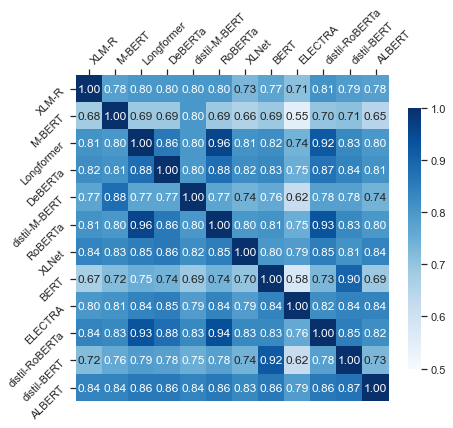

In [186]:
plot_corr_heatmap(df, 'R2-pairwise-v2.pdf')